# IMPORTING LIBARIES

In [1]:
#Importing Libraries for Exploratory Data Analysis
import numpy as np
import pandas as pd

In [2]:
#Importing dataset from a URL.
data=pd.read_excel('Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Exploratory Data Analysis


In [3]:
#checking for null values in data set
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
#  replacing the  null values with mean value
data.fillna(value='Route',axis=1,inplace=True)

In [5]:
data.fillna(value='Total_Stops',axis=1,inplace=True)

In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Data Preprocessing


In [7]:
# training and testing model selection
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
data['Airline']=le.fit_transform(data["Airline"])
data['Date_of_Journey']=le.fit_transform(data["Date_of_Journey"])
data['Source'] = le.fit_transform(data["Source"])
data['Destination'] = le.fit_transform(data["Destination"])
data['Duration'] = le.fit_transform(data["Duration"])
data['Arrival_Time'] = le.fit_transform(data["Arrival_Time"])
data['Dep_Time'] = le.fit_transform(data["Dep_Time"])
data['Route'] = le.fit_transform(data["Route"])
data['Additional_Info'] = le.fit_transform(data["Additional_Info"])
data['Total_Stops'] = le.fit_transform(data["Total_Stops"])

In [10]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,5,8,3897
1,1,6,3,0,84,31,906,336,1,8,7662
2,4,43,2,1,118,70,413,106,1,8,13882
3,3,10,3,0,91,164,1324,311,0,8,6218
4,3,0,0,5,29,149,1237,303,0,8,13302


In [11]:
x=data.iloc[: ,[0,1,2,3,4,5,6,7,8,9]]
y=data.Price

In [12]:
x.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,3,24,0,5,18,211,233,240,5,8
1,1,6,3,0,84,31,906,336,1,8
2,4,43,2,1,118,70,413,106,1,8
3,3,10,3,0,91,164,1324,311,0,8
4,3,0,0,5,29,149,1237,303,0,8


In [13]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

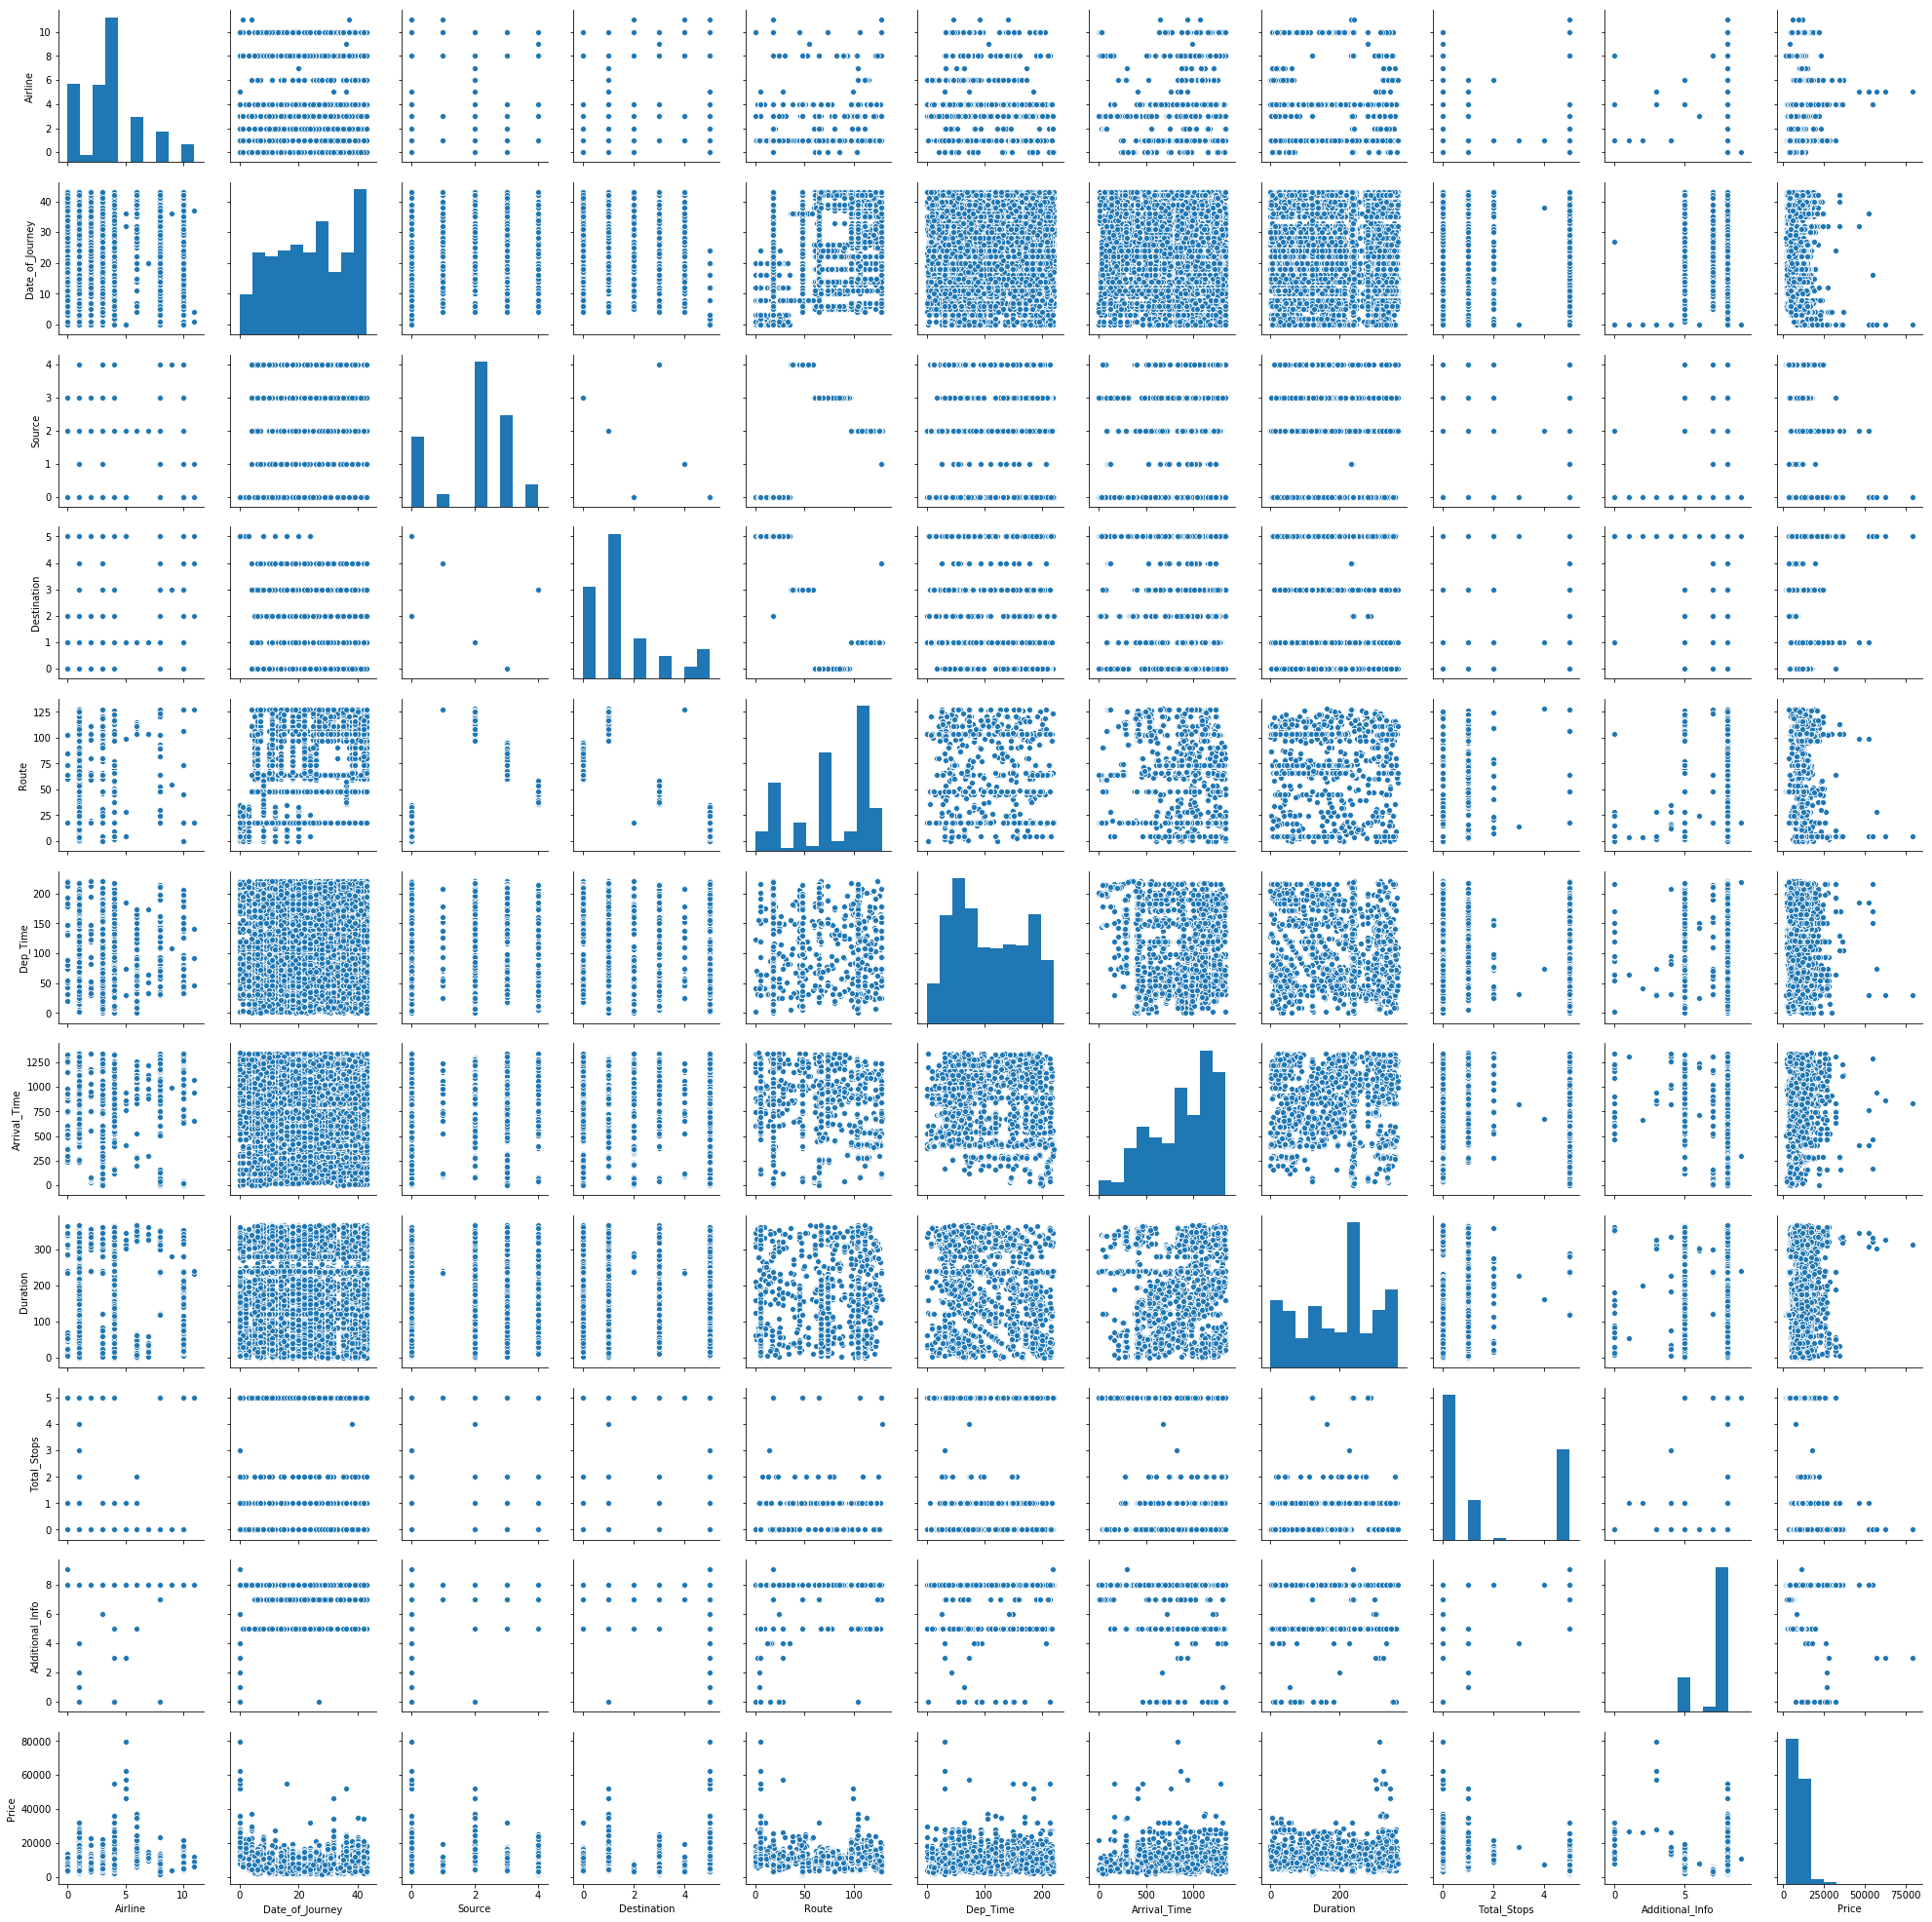

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(data)

In [15]:
# training and testing model selection
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 20,random_state = 10)

In [17]:
# Importing machine learning algorithm
from sklearn.linear_model import LogisticRegression

In [18]:
model=LogisticRegression()

In [19]:
model.fit(x_train,y_train)

C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
predict=model.predict(x_test)

In [21]:
predict

array([ 8586, 14151, 10844,  6442,  8372, 13014, 12723,  3100,  4030,
        3100,  3687,  5403, 13376,  3873,  4878, 12681, 14151,  8040,
        8452,  3543], dtype=int64)

In [22]:
# Model evaluation 
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(predict,y_test)

0.45

### Decision Tree

In [24]:
# training and testing model selection
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25,random_state = 10)

In [47]:
# Importing machine learning algorithm
from sklearn.tree import DecisionTreeRegressor

In [48]:
model1=DecisionTreeRegressor()

In [49]:
model1.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [50]:
predict1=model1.predict(x_test)

In [51]:
predict1

array([ 7594., 13067., 10539., ..., 13014.,  5117., 10262.])

In [52]:
# Model evaluation 
from sklearn.metrics import r2_score


In [53]:
r2_score(predict1,y_test)

0.8102434824432728

### Random Forest

In [54]:
# training and testing model selection
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20,random_state = 10)

In [64]:
# Importing machine learning algorithm
from sklearn.ensemble import RandomForestRegressor

In [65]:
model2=RandomForestRegressor()

In [66]:
model2.fit(x_train,y_train)

C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [67]:
predict2=model2.predict(x_test)

In [68]:
predict2

array([ 8620. , 13931.9, 10463.4, ...,  6663.1,  8308.8,  3680.4])

In [69]:
# Model evaluation 
from sklearn.metrics import r2_score

In [70]:
r2_score(predict2,y_test)

0.8149098695357893

### KNN

In [71]:
# training and testing model selection
from sklearn.model_selection import train_test_split

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state = 10)

In [73]:
# Importing machine learning algorithm
from sklearn.neighbors import KNeighborsRegressor

In [80]:
model=KNeighborsRegressor(n_neighbors=10)

In [81]:
model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [82]:
predict3=model.predict(x_test)
predict3

array([11720.6, 11520.9, 11467.9, ...,  4851.2,  7383.1,  3622.4])

In [83]:
y_test

2389      6224
5411     14151
2674     10539
970       7934
5845     16754
10267    11447
3476     11522
9501      3100
4033      4030
121       3100
7657      9125
3422      7608
1667     13376
4882      3873
5469      5823
9862     12681
3868     14151
5925      7417
9492      9922
8922      3543
1298      6069
2647     12534
4647     13014
2089      7832
2736      6961
2145      2647
10122     7952
4535     16932
10066     9165
1600      7888
         ...  
4714     14067
3296      4804
6666      8307
10384     3625
7343      7268
7678      4435
6232     12192
4002     13790
4470     15288
2859     10197
4191     14388
835      10844
7993      9103
8640     10441
2793      6064
667      14221
7730      4332
1231      4544
5365     15129
418      15411
7455      8066
9697      3625
6016     14571
4239      7038
2694      4226
3727      6938
7639      6628
860       6144
9115      7804
8102      3597
Name: Price, Length: 2137, dtype: int64

In [84]:
# Model evaluation 
from sklearn.metrics import r2_score,confusion_matrix

In [85]:
r2_score(y_test,predict3)

0.5436529408071258